<a href="https://colab.research.google.com/github/PhamAnhKiet20146220/AI-T7-tiet_1234/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
y_train.shape

(50000, 1)

In [22]:
x_test.shape

(10000, 32, 32, 3)

In [23]:
y_test.shape

(10000, 1)

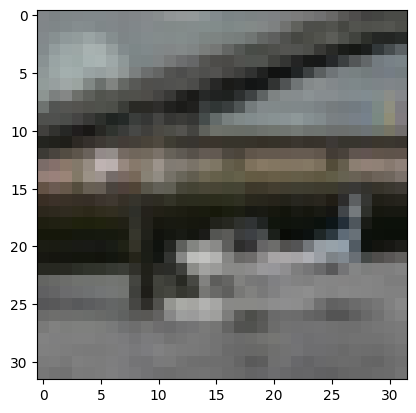

Hình [[[130 134 137]
  [125 131 133]
  [128 135 137]
  ...
  [ 68  69  66]
  [ 74  75  71]
  [ 74  75  71]]

 [[129 134 137]
  [127 134 136]
  [129 137 139]
  ...
  [ 81  82  77]
  [ 84  85  80]
  [ 77  78  73]]

 [[131 137 140]
  [135 144 145]
  [143 153 154]
  ...
  [ 36  38  36]
  [ 35  37  35]
  [ 39  42  40]]

 ...

 [[128 128 128]
  [127 127 127]
  [125 125 125]
  ...
  [108 108 108]
  [112 112 112]
  [116 116 116]]

 [[123 123 123]
  [124 124 124]
  [120 120 120]
  ...
  [101 101 101]
  [108 108 108]
  [112 112 112]]

 [[119 119 119]
  [115 115 115]
  [114 114 114]
  ...
  [107 107 107]
  [108 108 108]
  [115 115 115]]]


In [24]:
digit = x_train[812]
plt.imshow(digit,cmap = plt.cm.binary)
plt.show()
print('Hình', x_train[812])

<ipython-input-25-667916c02bdb>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


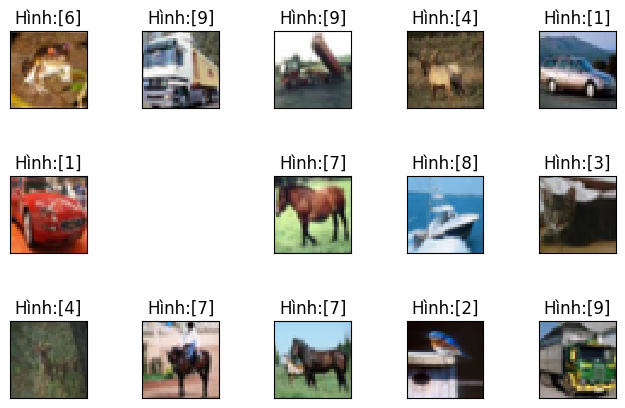

In [25]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation="none")
  plt.title("Hình:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(5000, activation="relu", input_shape = (32*32*3,)))
model.add(Dense(3000, activation= 'relu'))
model.add(Dense(1000, activation= 'relu'))
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5000)              15365000  
                                                                 
 dense_7 (Dense)             (None, 3000)              15003000  
                                                                 
 dense_8 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_9 (Dense)             (None, 10)                10010     
                                                                 
Total params: 33,379,010
Trainable params: 33,379,010
Non-trainable params: 0
_________________________________________________________________


In [29]:
x = x_test
y = y_test

In [30]:
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

In [31]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [32]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 128)
test_loss, test_acc=model.evaluate(x_test, y_test)
print('Mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/10
391/391 [==============================] - 6s 12ms/step - loss: 2.3760 - accuracy: 0.2477
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 1.8268 - accuracy: 0.3418
Epoch 3/10
391/391 [==============================] - 5s 12ms/step - loss: 1.7329 - accuracy: 0.3758
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 1.6699 - accuracy: 0.3972
Epoch 5/10
391/391 [==============================] - 5s 12ms/step - loss: 1.6153 - accuracy: 0.4191
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 1.5746 - accuracy: 0.4333
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 1.5323 - accuracy: 0.4500
Epoch 8/10
391/391 [==============================] - 4s 11ms/step - loss: 1.5016 - accuracy: 0.4628
Epoch 9/10
391/391 [==============================] - 4s 11ms/step - loss: 1.4596 - accuracy: 0.4795
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 1.5386 - accurac

In [33]:
model.save('test1.h5')

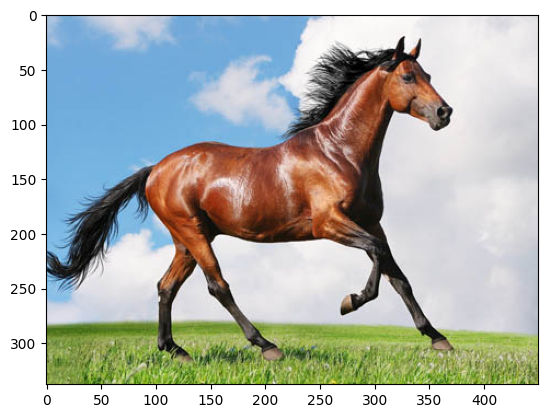

In [34]:
img = plt.imread('/content/drive/MyDrive/con ngựa.jpg')
plt.imshow(img)

1/1 [==============================] - 0s 55ms/step


array([7])

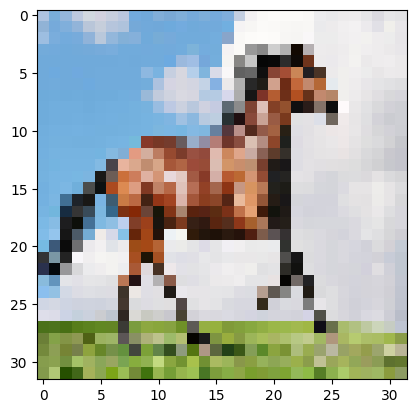

In [35]:
import numpy as np
from keras.utils import load_img, img_to_array
img=load_img('/content/drive/MyDrive/con ngựa.jpg', target_size=(32,32)) #filename
plt.imshow(img)
img=img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis =1)